Wasif Sohail (BSAI-195)

Machine Learning Project: Heart Disease Prediction and Clustering

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets
print(heart_disease.metadata)
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [9]:
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable: {y.columns[0]}")

Number of samples: 303
Number of features: 13
Target variable: num


Data Exploration and Preprocessing

In [10]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

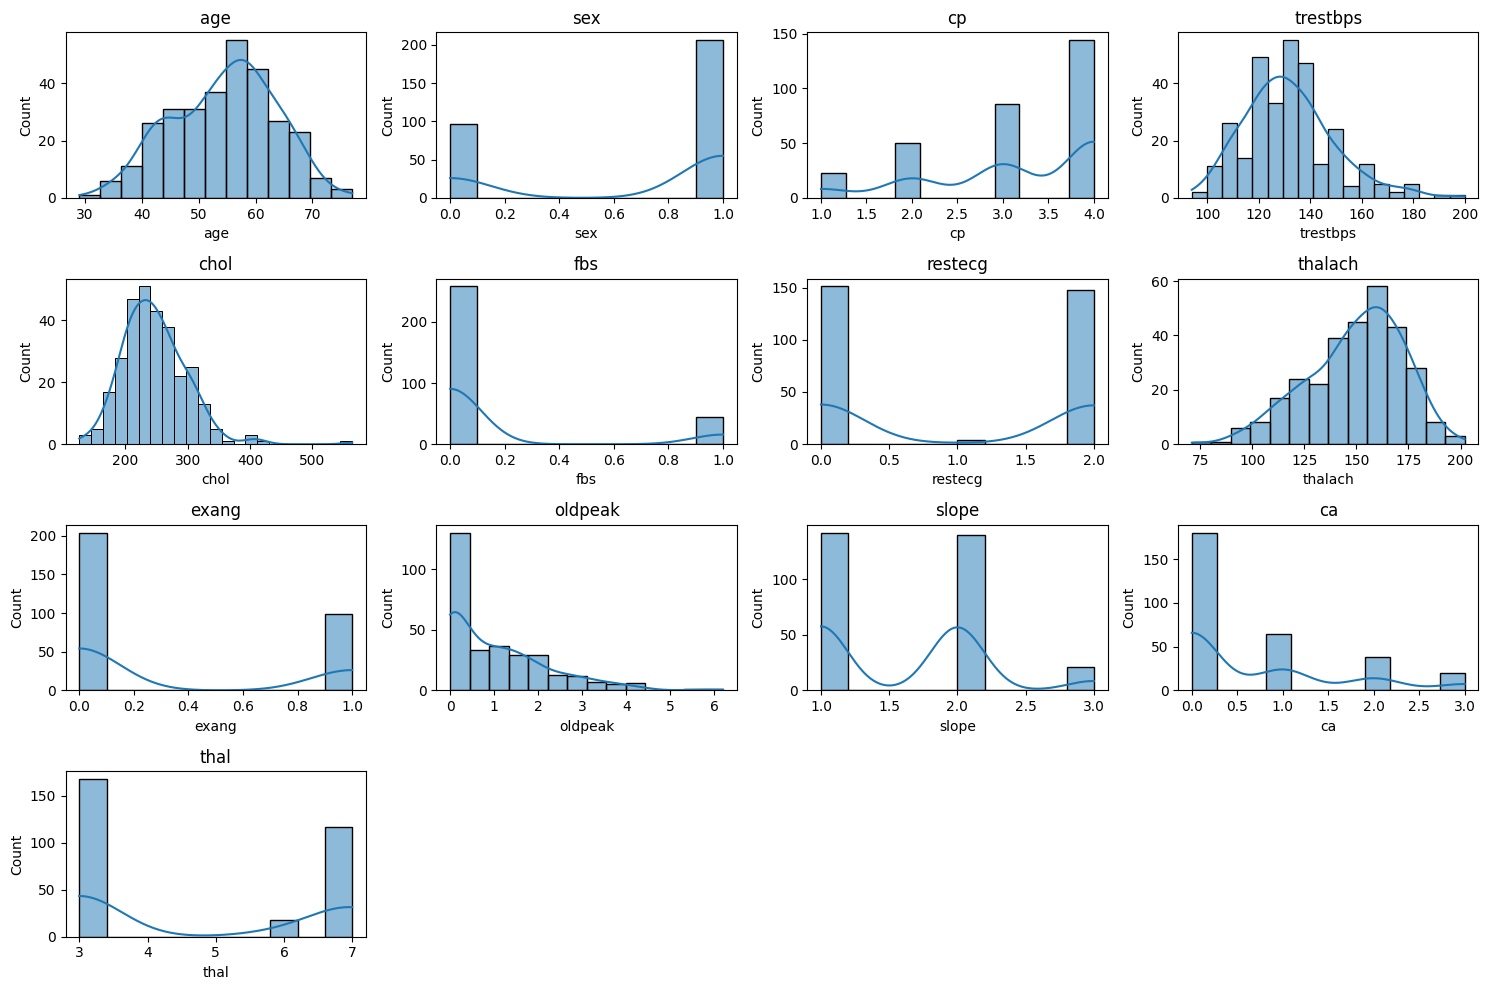

In [12]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_imputed.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(X_imputed[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

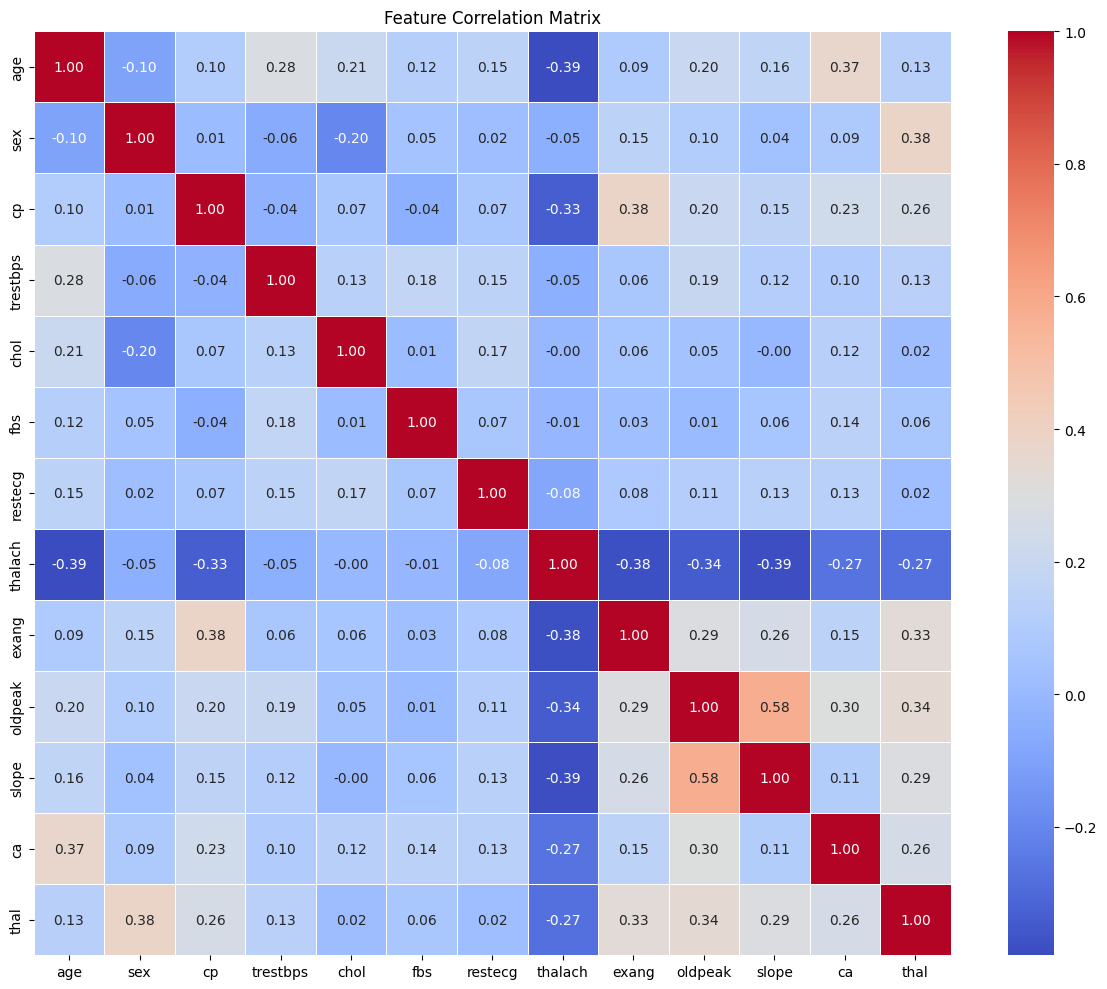

In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = X_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

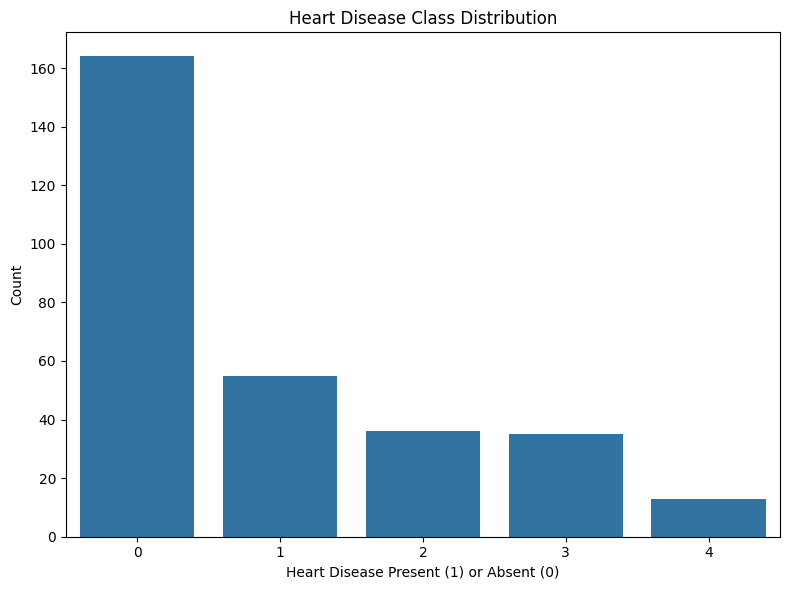

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y.values.ravel())
plt.title('Heart Disease Class Distribution')
plt.xlabel('Heart Disease Present (1) or Absent (0)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


Supervised Learning

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.2, random_state=42)

In [26]:
def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Fix: Add 'average' parameter for multiclass classification
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation score
    cv_scores = cross_val_score(model, X_scaled, y.values.ravel(), cv=5, scoring='accuracy')

    # Report results
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Cross-validation accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'confusion_matrix_{name.lower().replace(" ", "_")}.png')

    return {
        'name': name,
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_accuracy': np.mean(cv_scores)
    }

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression(max_iter=1000, random_state=42)},
    {'name': 'Neural Network', 'model': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)},
    {'name': 'Random Forest', 'model': RandomForestClassifier(n_estimators=100, random_state=42)},
]

E:\BSAI-5th\DataMining\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Logistic Regression Performance:
Accuracy: 0.5410
Precision: 0.5120
Recall: 0.5410
F1-Score: 0.5212
Cross-validation accuracy: 0.5941 (±0.0641)

Neural Network Performance:
Accuracy: 0.4918
Precision: 0.4384
Recall: 0.4918
F1-Score: 0.4618
Cross-validation accuracy: 0.5609 (±0.0314)


E:\BSAI-5th\DataMining\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest Performance:
Accuracy: 0.5082
Precision: 0.4042
Recall: 0.5082
F1-Score: 0.4463
Cross-validation accuracy: 0.6070 (±0.0497)


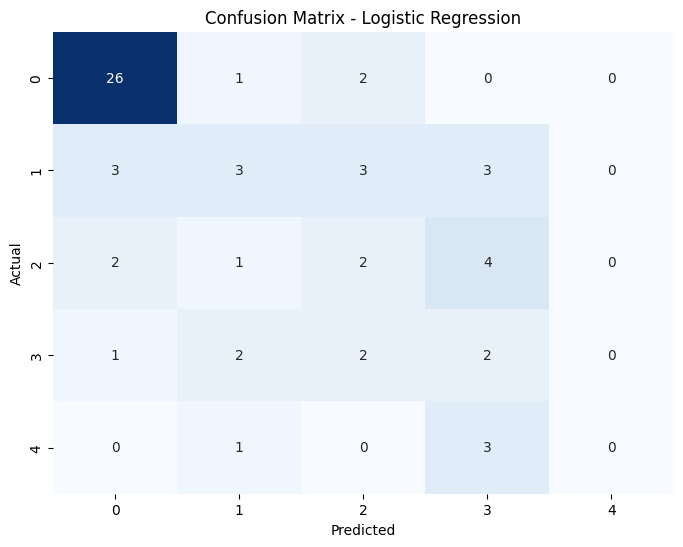

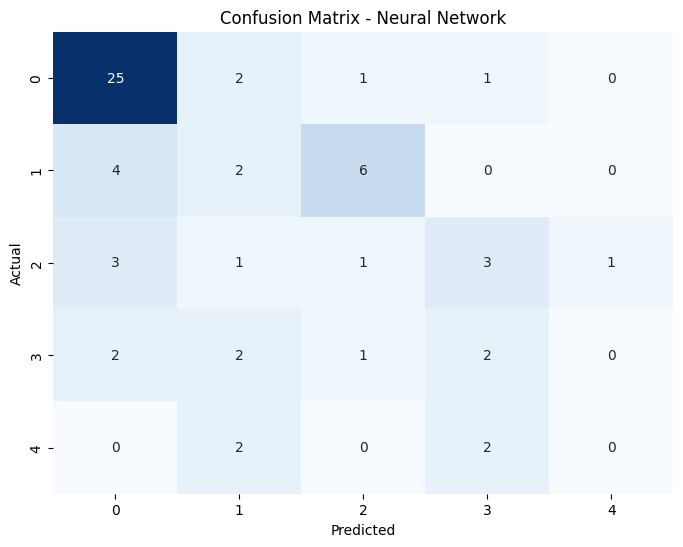

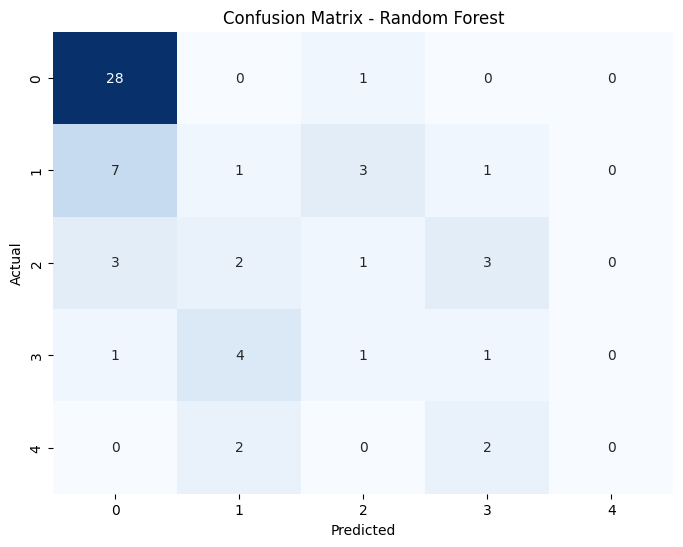

In [28]:
results = []
for model_info in models:
    result = evaluate_model(model_info['model'], model_info['name'], X_train, X_test, y_train, y_test)
    results.append(result)

# Compare model performance
model_names = [result['name'] for result in results]
accuracies = [result['accuracy'] for result in results]
precisions = [result['precision'] for result in results]
recalls = [result['recall'] for result in results]
f1_scores = [result['f1'] for result in results]

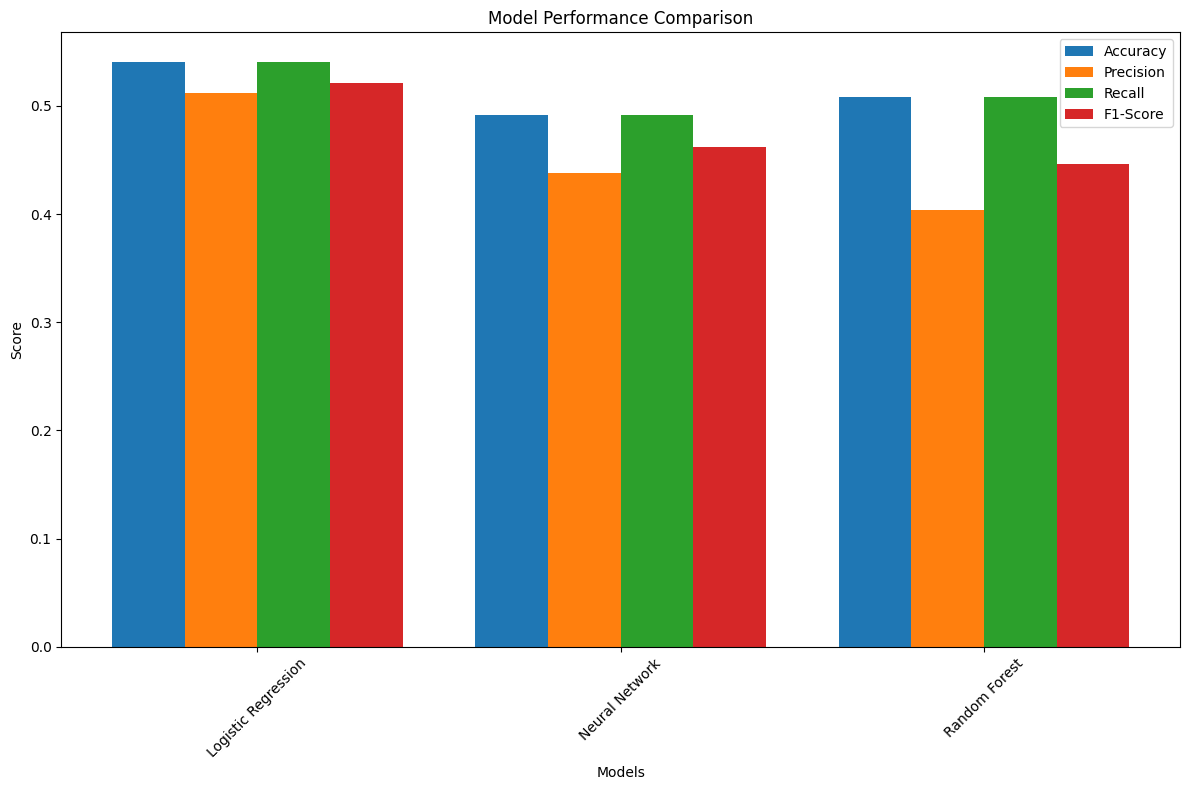

In [29]:
plt.figure(figsize=(12, 8))
x = np.arange(len(model_names))
width = 0.2

plt.bar(x - width*1.5, accuracies, width, label='Accuracy')
plt.bar(x - width/2, precisions, width, label='Precision')
plt.bar(x + width/2, recalls, width, label='Recall')
plt.bar(x + width*1.5, f1_scores, width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
best_model = max(results, key=lambda x: x['f1'])
print(f"Best performing model: {best_model['name']} with F1-Score: {best_model['f1']:.4f}")

Best performing model: Logistic Regression with F1-Score: 0.5212


Unsupervised Learning

In [34]:
from sklearn.cluster import KMeans
X_for_clustering = X_scaled.copy()

In [35]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

E:\BSAI-5th\DataMining\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\BSAI-5th\DataMining\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "E:\BSAI-5th\DataMining\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwa

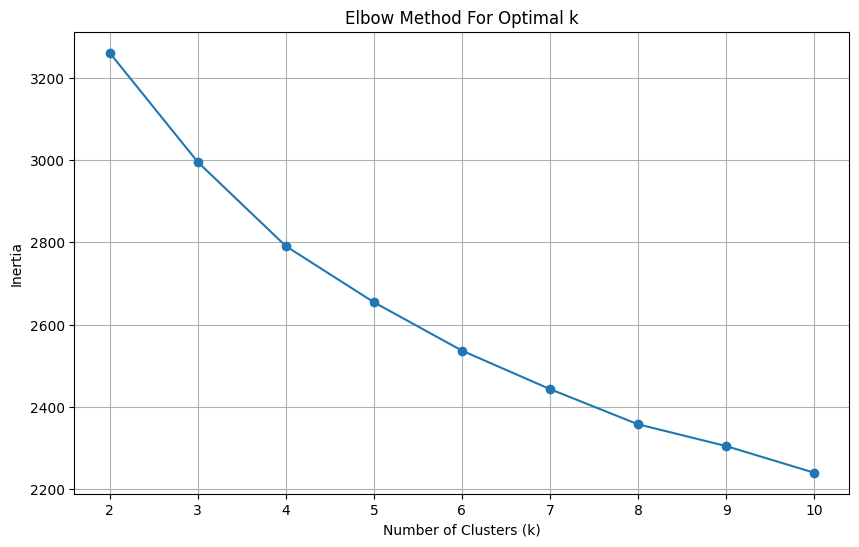

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [37]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_for_clustering)

E:\BSAI-5th\DataMining\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
X_clustered = X_imputed.copy()
X_clustered['Cluster'] = cluster_labels
X_clustered['Heart_Disease'] = y.values.ravel()

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_for_clustering)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Heart_Disease'] = y.values.ravel()

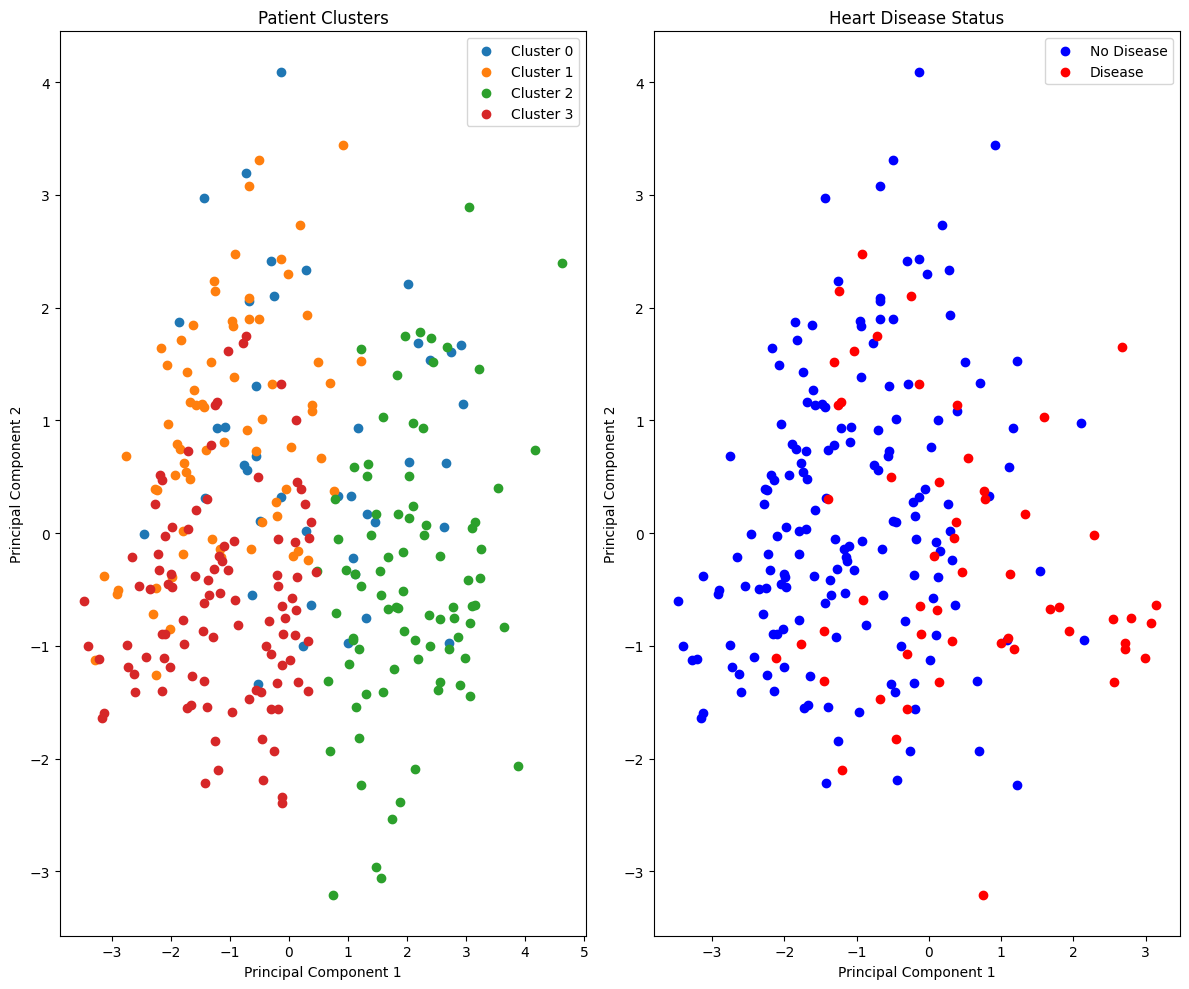

In [40]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
for i in range(optimal_k):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PC1'],
                pca_df[pca_df['Cluster'] == i]['PC2'],
                label=f'Cluster {i}')
plt.title('Patient Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot clusters colored by heart disease status
plt.subplot(1, 2, 2)
colors = {0:'blue', 1:'red'}
for disease_status, color in colors.items():
    mask = pca_df['Heart_Disease'] == disease_status
    plt.scatter(pca_df.loc[mask, 'PC1'],
                pca_df.loc[mask, 'PC2'],
                c=color,
                label=f'{"Disease" if disease_status == 1 else "No Disease"}')
plt.title('Heart Disease Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
X_clustered.groupby('Cluster').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Heart_Disease
Cluster,,,,,,,,,,,,,,
0,57.309524,0.738095,3.047619,138.738095,247.333333,1.000000,1.142857,150.500000,0.333333,0.997619,1.642857,1.000000,4.880952,1.071429
1,55.109589,0.013699,3.054795,129.561644,255.794521,0.000000,0.863014,154.534247,0.150685,0.561644,1.493151,0.301370,3.109589,0.095890
2,58.070588,0.847059,3.800000,134.211765,252.611765,0.023529,1.282353,128.611765,0.705882,2.054118,2.023529,1.235294,6.235294,2.152941
3,49.796117,0.990291,2.747573,128.242718,235.097087,0.009709,0.776699,163.077670,0.135922,0.558252,1.310680,0.310680,4.553398,0.475728


In [43]:
cluster_disease=X_clustered.groupby('Cluster')['Heart_Disease'].mean()
cluster_disease

Cluster
0    1.071429
1    0.095890
2    2.152941
3    0.475728
Name: Heart_Disease, dtype: float64

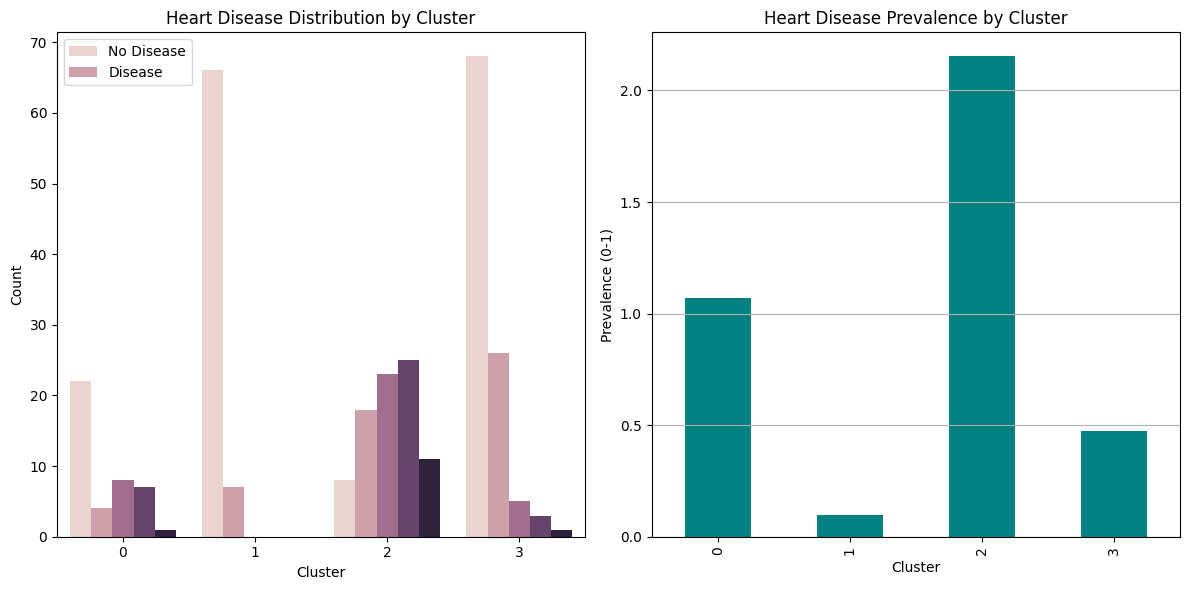

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Cluster', hue='Heart_Disease', data=X_clustered)
plt.title('Heart Disease Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

plt.subplot(1, 2, 2)
cluster_disease.plot(kind='bar', color='teal')
plt.title('Heart Disease Prevalence by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Prevalence (0-1)')
plt.grid(axis='y')

plt.tight_layout()

Patient Risk Profiles and Clinical Insights

Clinical Recommendations:
Based on the analysis, we recommend:
1. Risk Stratification:
   - Utilize the Logistic Regression for initial risk screening of patients.
   - Focus special attention on the identified high-risk factors.
2. Personalized Treatment Strategies:
   - For patients in high-risk clusters, implement more frequent monitoring and aggressive prevention.
   - For patients in lower-risk clusters with certain risk factors, develop targeted intervention programs.
3. Resource Allocation:
   - Prioritize resources based on cluster risk profiles and personalized prediction scores.
4. Preventive Measures:
   - Design specific educational programs addressing the key risk factors identified in each cluster.